# Importy

In [280]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

# Oczyszczanie danych


In [40]:
# Przypisuję wczytanie pliku do zmiennej
laptop=pd.read_csv('laptop_price.csv')

In [41]:
# Sprawdzam czy wgrałem poprawny plik, widzę przykładowe dane z pierwszych 5 wierszy.
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [42]:
# Wyciągam informacje o tym jakie typy danych są zapisane w poszczególnych kolumnach oraz czy są wypełnione wszystkie wiersze (czy dane są kompletne)
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [43]:
# Zestaw podstawowych statystyk, count potwierdza liczbę wierszy w każdej kolumnie.
laptop.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [44]:
# Przypisuję wywołanie unikalnych rekordów z kolumny Company do zmiennej K
K=pd.unique(laptop['Company'])

In [45]:
# Wywołuję numpajem Macierz na zmiennej K
# np.array(laptop['Company']).reshape(-1,1)
np.array(K).reshape(-1,1)

array([['Apple'],
       ['HP'],
       ['Acer'],
       ['Asus'],
       ['Dell'],
       ['Lenovo'],
       ['Chuwi'],
       ['MSI'],
       ['Microsoft'],
       ['Toshiba'],
       ['Huawei'],
       ['Xiaomi'],
       ['Vero'],
       ['Razer'],
       ['Mediacom'],
       ['Samsung'],
       ['Google'],
       ['Fujitsu'],
       ['LG']], dtype=object)

In [46]:
# inna metoda otrzymania unikalnych rekordów z kolumny Company wraz z liczebnością (poniżej kolejne kolumny oddzielnie)
laptop['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [47]:
laptop['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [48]:
laptop['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [49]:
laptop['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [50]:
laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [51]:
laptop['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

Ram

In [52]:
# Wywołanie kolumny ram z pliku csv (laptop), po czym zamiana stringa 'GB' na string pusty '' - co jest równoznaczne z usunięciem
laptop['Ram'] = laptop['Ram'].str.replace("GB",'')

In [53]:
# Wywołanie kolumny Ram z pliku csv (laptop), po czym zamiana typu danych z objektu na intiger - liczby całkowite i wywołanie pierwszych 5 wierszy dla sprawdzenia efektu
laptop['Ram'] = laptop['Ram'].astype('int64')
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Waga

In [54]:
# Wywołanie kolumny Weight z pliku csv (laptop), po czym zamiana stringa 'kg' na string pusty '' - co jest równoznaczne z usunięciem
laptop['Weight'] = laptop['Weight'].str.replace("kg",'')

In [55]:
# Wywołanie kolumny Weight z pliku csv (laptop), po czym zamiana typu danych z objektu na float - liczby zmiennoprzecinkowe i wywołanie pierwszych 5 wierszy dla sprawdzenia efektu
laptop['Weight'] = laptop['Weight'].astype('float64')
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<Axes: >

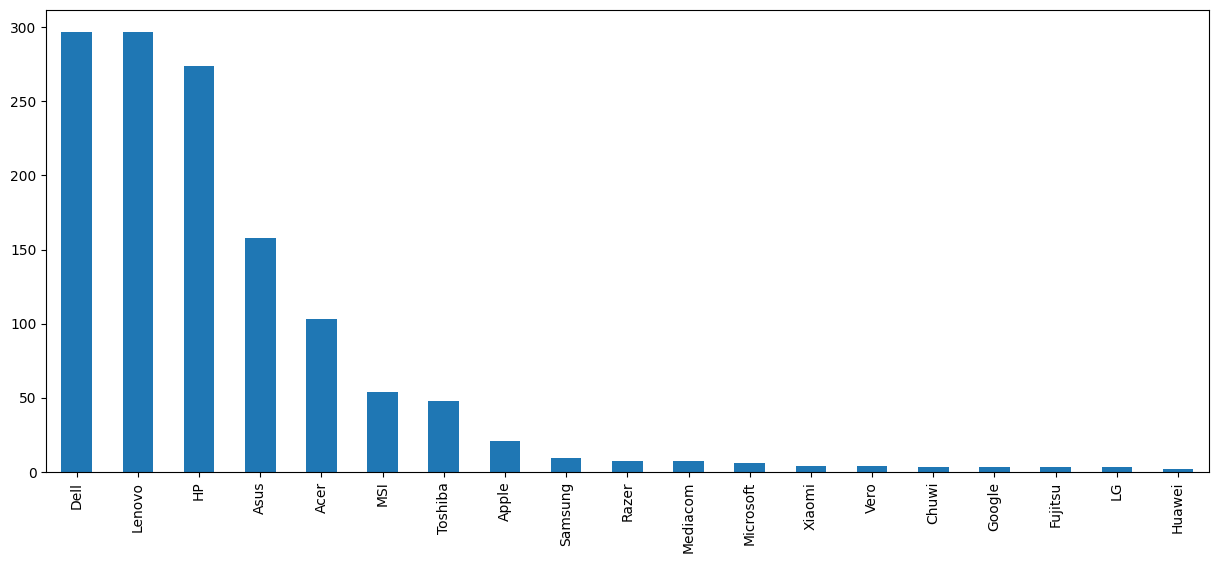

In [56]:
# opcjonlany wykresik dla chętnych
plt.figure(figsize = (15,6))
laptop['Company'].value_counts().plot(kind = 'bar')

Company

In [137]:
laptop['Comp_no'] = '0'

In [138]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [139]:
laptop.loc[laptop['Company'] == 'Apple', 'Comp_no'] = 1
laptop.loc[laptop['Company'] == 'HP', 'Comp_no'] = 2
laptop.loc[laptop['Company'] == 'Acer', 'Comp_no'] = 3
laptop.loc[laptop['Company'] == 'Asus', 'Comp_no'] = 4
laptop.loc[laptop['Company'] == 'Dell', 'Comp_no'] = 5
laptop.loc[laptop['Company'] == 'Lenovo', 'Comp_no'] = 6
laptop.loc[laptop['Company'] == 'Chuwi', 'Comp_no'] = 7
laptop.loc[laptop['Company'] == 'MSI', 'Comp_no'] = 8
laptop.loc[laptop['Company'] == 'Microsoft', 'Comp_no'] = 9

In [140]:
laptop.loc[laptop['Company'] == 'Toshiba', 'Comp_no'] = 10
laptop.loc[laptop['Company'] == 'Huawei', 'Comp_no'] = 11
laptop.loc[laptop['Company'] == 'Xiaomi', 'Comp_no'] = 12
laptop.loc[laptop['Company'] == 'Vero', 'Comp_no'] = 13
laptop.loc[laptop['Company'] == 'Razer', 'Comp_no'] = 14
laptop.loc[laptop['Company'] == 'Mediacom', 'Comp_no'] = 15
laptop.loc[laptop['Company'] == 'Samsung', 'Comp_no'] = 16
laptop.loc[laptop['Company'] == 'Google', 'Comp_no'] = 17
laptop.loc[laptop['Company'] == 'Fujitsu', 'Comp_no'] = 18
laptop.loc[laptop['Company'] == 'LG', 'Comp_no'] = 19

In [ ]:
laptop.head()

In [167]:
laptop['Comp_no'] = pd.to_numeric(laptop.Comp_no)


In [168]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           1303 non-null   int64  
 1   Company             1303 non-null   object 
 2   Product             1303 non-null   object 
 3   TypeName            1303 non-null   object 
 4   Inches              1303 non-null   float64
 5   ScreenResolution    1303 non-null   object 
 6   Cpu                 1303 non-null   object 
 7   Ram                 1303 non-null   int64  
 8   Memory              1303 non-null   object 
 9   Gpu                 1303 non-null   object 
 10  OpSys               1303 non-null   object 
 11  Weight              1303 non-null   float64
 12  Price_euros         1303 non-null   float64
 13  Additional_Memory   208 non-null    object 
 14  Basic_Memory        1303 non-null   object 
 15  Basic_Memory_Type   1303 non-null   object 
 16  Basic_

Pamięć

In [142]:
# Na początek rozdzielamy kolumnę na dwie, jedna z pojemnością, a druga z typem dysku
split=laptop['Memory'].str.split('+',1,expand=True)
split

,0,1
0,128GB SSD,None
1,128GB Flash Storage,None
2,256GB SSD,None
3,512GB SSD,None
4,256GB SSD,None
...,...,...
1298,128GB SSD,None
1299,512GB SSD,None
1300,64GB Flash Storage,None
1301,1TB HDD,None


In [143]:
# Nadajemy nazwy nowym kolumnom
laptop['Additional_Memory'] = split[1]
laptop['Basic_Memory'] = split[0]

In [144]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Additional_Memory,Basic_Memory,Basic_Memory_Type,Basic_Memory_Space,Comp_no
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,None,128GB SSD,SSD,128,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,None,128GB Flash Storage,Flash Storage,128,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,None,256GB SSD,SSD,256,2
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,None,512GB SSD,SSD,512,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,None,256GB SSD,SSD,256,1


In [145]:
split2=laptop['Basic_Memory'].str.split(' ',1,expand=True)
split2

,0,1
0,128GB,SSD
1,128GB,Flash Storage
2,256GB,SSD
3,512GB,SSD
4,256GB,SSD
...,...,...
1298,128GB,SSD
1299,512GB,SSD
1300,64GB,Flash Storage
1301,1TB,HDD


In [146]:
laptop['Basic_Memory_Type'] = split2[1]
laptop['Basic_Memory_Space'] = split2[0]

In [147]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Additional_Memory,Basic_Memory,Basic_Memory_Type,Basic_Memory_Space,Comp_no
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,None,128GB SSD,SSD,128GB,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,None,128GB Flash Storage,Flash Storage,128GB,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,None,256GB SSD,SSD,256GB,2
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,None,512GB SSD,SSD,512GB,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,None,256GB SSD,SSD,256GB,1


In [148]:
laptop['Basic_Memory_Space'].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [149]:
laptop_mem= laptop['Basic_Memory_Space'].str.split('(\d+)',  expand=True)

In [150]:
laptop['Basic_Memory_Space'] = pd.to_numeric(laptop_mem[1])

In [151]:
laptop['Basic_Memory_Space'].unique()

array([128, 256, 512, 500,   1,  32,  64,   2,  16, 180, 240,   8, 508])

In [152]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Additional_Memory,Basic_Memory,Basic_Memory_Type,Basic_Memory_Space,Comp_no
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,None,128GB SSD,SSD,128,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,None,128GB Flash Storage,Flash Storage,128,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,None,256GB SSD,SSD,256,2
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,None,512GB SSD,SSD,512,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,None,256GB SSD,SSD,256,1


In [153]:
laptop['Basic_Memory_Space'] = laptop['Basic_Memory_Space'].apply(lambda x: 1024 if x==1 else x)
laptop['Basic_Memory_Space'] = laptop['Basic_Memory_Space'].apply(lambda x: 2048 if x==2 else x)


In [154]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Additional_Memory,Basic_Memory,Basic_Memory_Type,Basic_Memory_Space,Comp_no
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,None,128GB SSD,SSD,128,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,None,128GB Flash Storage,Flash Storage,128,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,None,256GB SSD,SSD,256,2
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,None,512GB SSD,SSD,512,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,None,256GB SSD,SSD,256,1


In [ ]:
laptop.info()

# Modele predykcyjne

Korelacja

In [171]:
# Definiuję nową zmienną aby móc wyliczyć korelację


laptop1 = laptop.drop(['ScreenResolution','Cpu','Memory','Gpu','laptop_ID'], axis= 1)

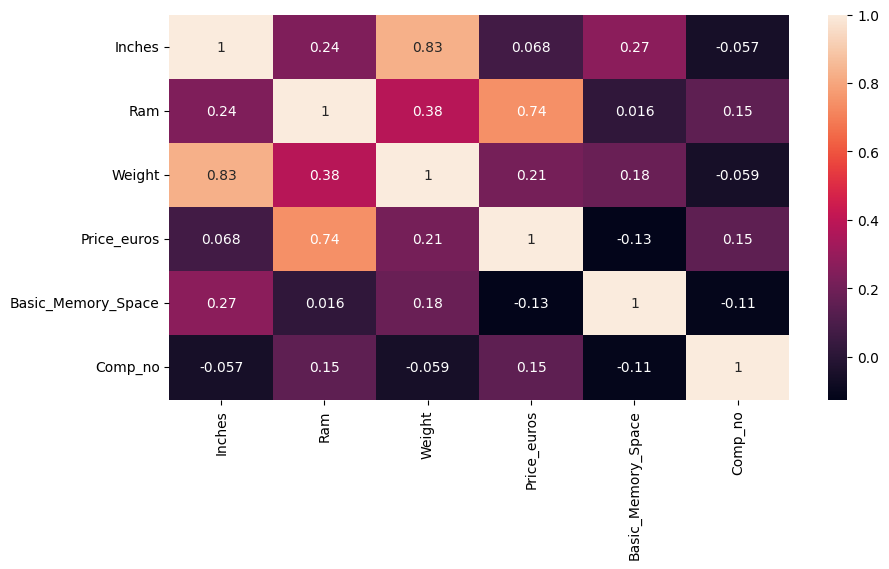

In [172]:

fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(laptop1.corr(), annot = True)
plt.show()

Regresja liniowa

In [228]:

# Tworzymy dwie zmienne jedną szukaną i drugą zbiorczą utworzoną z kolumn, które chcemy przetestować.
# x = laptop[['Company','TypeName','Inches','Ram','OpSys','Weight','Additional_Memory','Basic_Memory_Type','Basic_Memory_Space']]  

x = laptop[['Inches','Ram','Weight','Basic_Memory_Space','Comp_no']]    #zbiór wielu zmiennych definiujących cenę
y = laptop['Price_euros']


In [250]:
#Rozdzielam dane na model testowy i treningowy
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [251]:
# Sprawdzam regresjęliniową na danych testowych dla modelu1
model1 = LinearRegression()
model1.fit(x, y)

LinearRegression()

In [252]:
n_pred = model1.predict(x)

In [253]:
n_pred

array([1200.58146205, 1199.77865378, 1076.89053446, ...,  584.25881553,
        712.72612131,  627.6951361 ])

In [254]:
pd.DataFrame({'actual':y, 'prediction':n_pred})

,actual,prediction
0,1339.69,1200.581462
1,898.94,1199.778654
2,575.00,1076.890534
3,2537.45,1857.708500
4,1803.60,1173.070021
...,...,...
1298,638.00,786.457838
1299,1499.00,1972.888338
1300,229.00,584.258816
1301,764.00,712.726121


In [255]:
r2_score(y, n_pred)

0.5773857231916277

In [257]:
# Sprawdzam regresjęliniową na danych testowych dla modelu2
model2=LinearRegression()
model2.fit(xtrain, ytrain)

LinearRegression()

In [258]:
y_pred2=model2.predict(xtest)

In [259]:
r2_score(y_test, y_pred2)

0.5623410094959786

Drzewo decyzyjne

In [268]:
x = laptop[['Ram','Weight']]    #zbiór wielu zmiennych definiujących cenę - jedynie te z największą korelacją
y = laptop['Price_euros']

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [270]:
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [271]:
y_dt_train=dt.predict(x_train)

In [272]:
y_dt_test=dt.predict(x_test)

In [273]:
bias_dt_train=mean_absolute_percentage_error(y_train, y_dt_train)
print(bias_dt_train)

0.1903626063587798


In [274]:
bias_dt_test=mean_absolute_percentage_error(y_test, y_dt_test)
print(bias_dt_test)

0.2557422199859978


In [275]:
variance_dt=bias_dt_test-bias_dt_train
print(variance_dt)

0.06537961362721798


In [ ]:
# Wysoki bias na zbiorze treningowym i testowym, niska wariancja -> model jest niedouczony.

# Niski bias na zbiorze treningowym, ale wysoki na zbiorze testowym, w związku z czym również wysoka wariancja -> model jest przeuczony/przetrenowany

# Niski bias na zbiorze treningowym i testowym, niska wariancja -> dobry model.

# Niski bias - najlepiej do 10%, ale można też założyć do 20% w zależności od założeń biznesowych/ projektowych.

# Niska wariancja- najlepiej do 5%.

Walidacja krzyżowa

In [281]:
cv=KFold(n_splits=5)  # n_splits- liczba podzbiorów
for train, test in cv.split(x,y):
  x_train, y_train= x.iloc[train], y.iloc[train]
  x_test, y_test= x.iloc[test], y.iloc[test]
  print(x_train.shape, x_test.shape)

(1042, 2) (261, 2)
(1042, 2) (261, 2)
(1042, 2) (261, 2)
(1043, 2) (260, 2)
(1043, 2) (260, 2)
